In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.style.use("dark_background")
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
p = cogsworth.pop.Population(1000, final_kstar1=[10, 11, 12, 13, 14],
                             use_default_BSE_settings=True)
p.create_population()

Run for 1000 binaries
Ended up with 1062 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[1.8s] Evolve binaries (run COSMIC)


1072it [00:06, 177.76it/s]                                                      


[8.3s] Get orbits (run gala)
Overall: 10.1s


From this population we can find the present-day astropy `SkyCoord` object with

In [4]:
final_coords = p.get_final_mw_skycoord()
final_coords

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    [( 1.69328962, -1.04440194, -0.29615422),
     ( 0.01813089,  0.62825602, -0.16942672),
     (-0.51802607,  2.87171406,  1.20764971), ...,
     (-3.64415867,  1.44618085, -0.12594862),
     ( 1.14425178, 10.35463121, -0.82082812),
     (-0.25623949,  0.062613  , -0.25369922)]
 (v_x, v_y, v_z) in km / s
    [(  67.15763912,  100.61504756, -153.10420402),
     (-131.75443023,   15.50758748,  -48.69445806),
     (-202.13457758,  -69.3337717 ,   70.05814909), ...,
     (-120.60631702, -202.20695684,  -27.77871136),
     (-227.49101264,  -51.72802798,   13.8563367 ),
     (  44.98729228,   55.22501995,   76.87950947)]>

You can transform this coordinate in all sorts of ways with astropy. Particularly relevant in this case is transforming to `icrs`, which lets us find the RA and Dec of each source.

In [5]:
final_coords.icrs

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(264.31502307, -34.98623027,  9.87575935),
     (270.08324664, -25.74002483,  8.16652859),
     (269.68506447,  -6.86871846,  8.21433919), ...,
     (277.37689811, -14.11520447,  4.70784437),
     (292.9797265 ,  11.92897637, 13.92083524),
     (268.49414793, -29.49584292,  7.87077122)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 1.27526806,  -4.31168276,   74.42146599),
     (-1.44887619,  -5.66678315, -160.5720377 ),
     (-5.11289418,  -3.59237281, -300.15762362), ...,
     (-6.26558752, -16.19729583, -263.43440913),
     ( 0.08665516,  -0.37834088, -381.5398464 ),
     (-4.20578686,  -3.45629028,   28.14240003)]>

Now we don't actually need to grab these coordinates, we can let ``cogsworth`` do that under the hood and just plot the sky positions

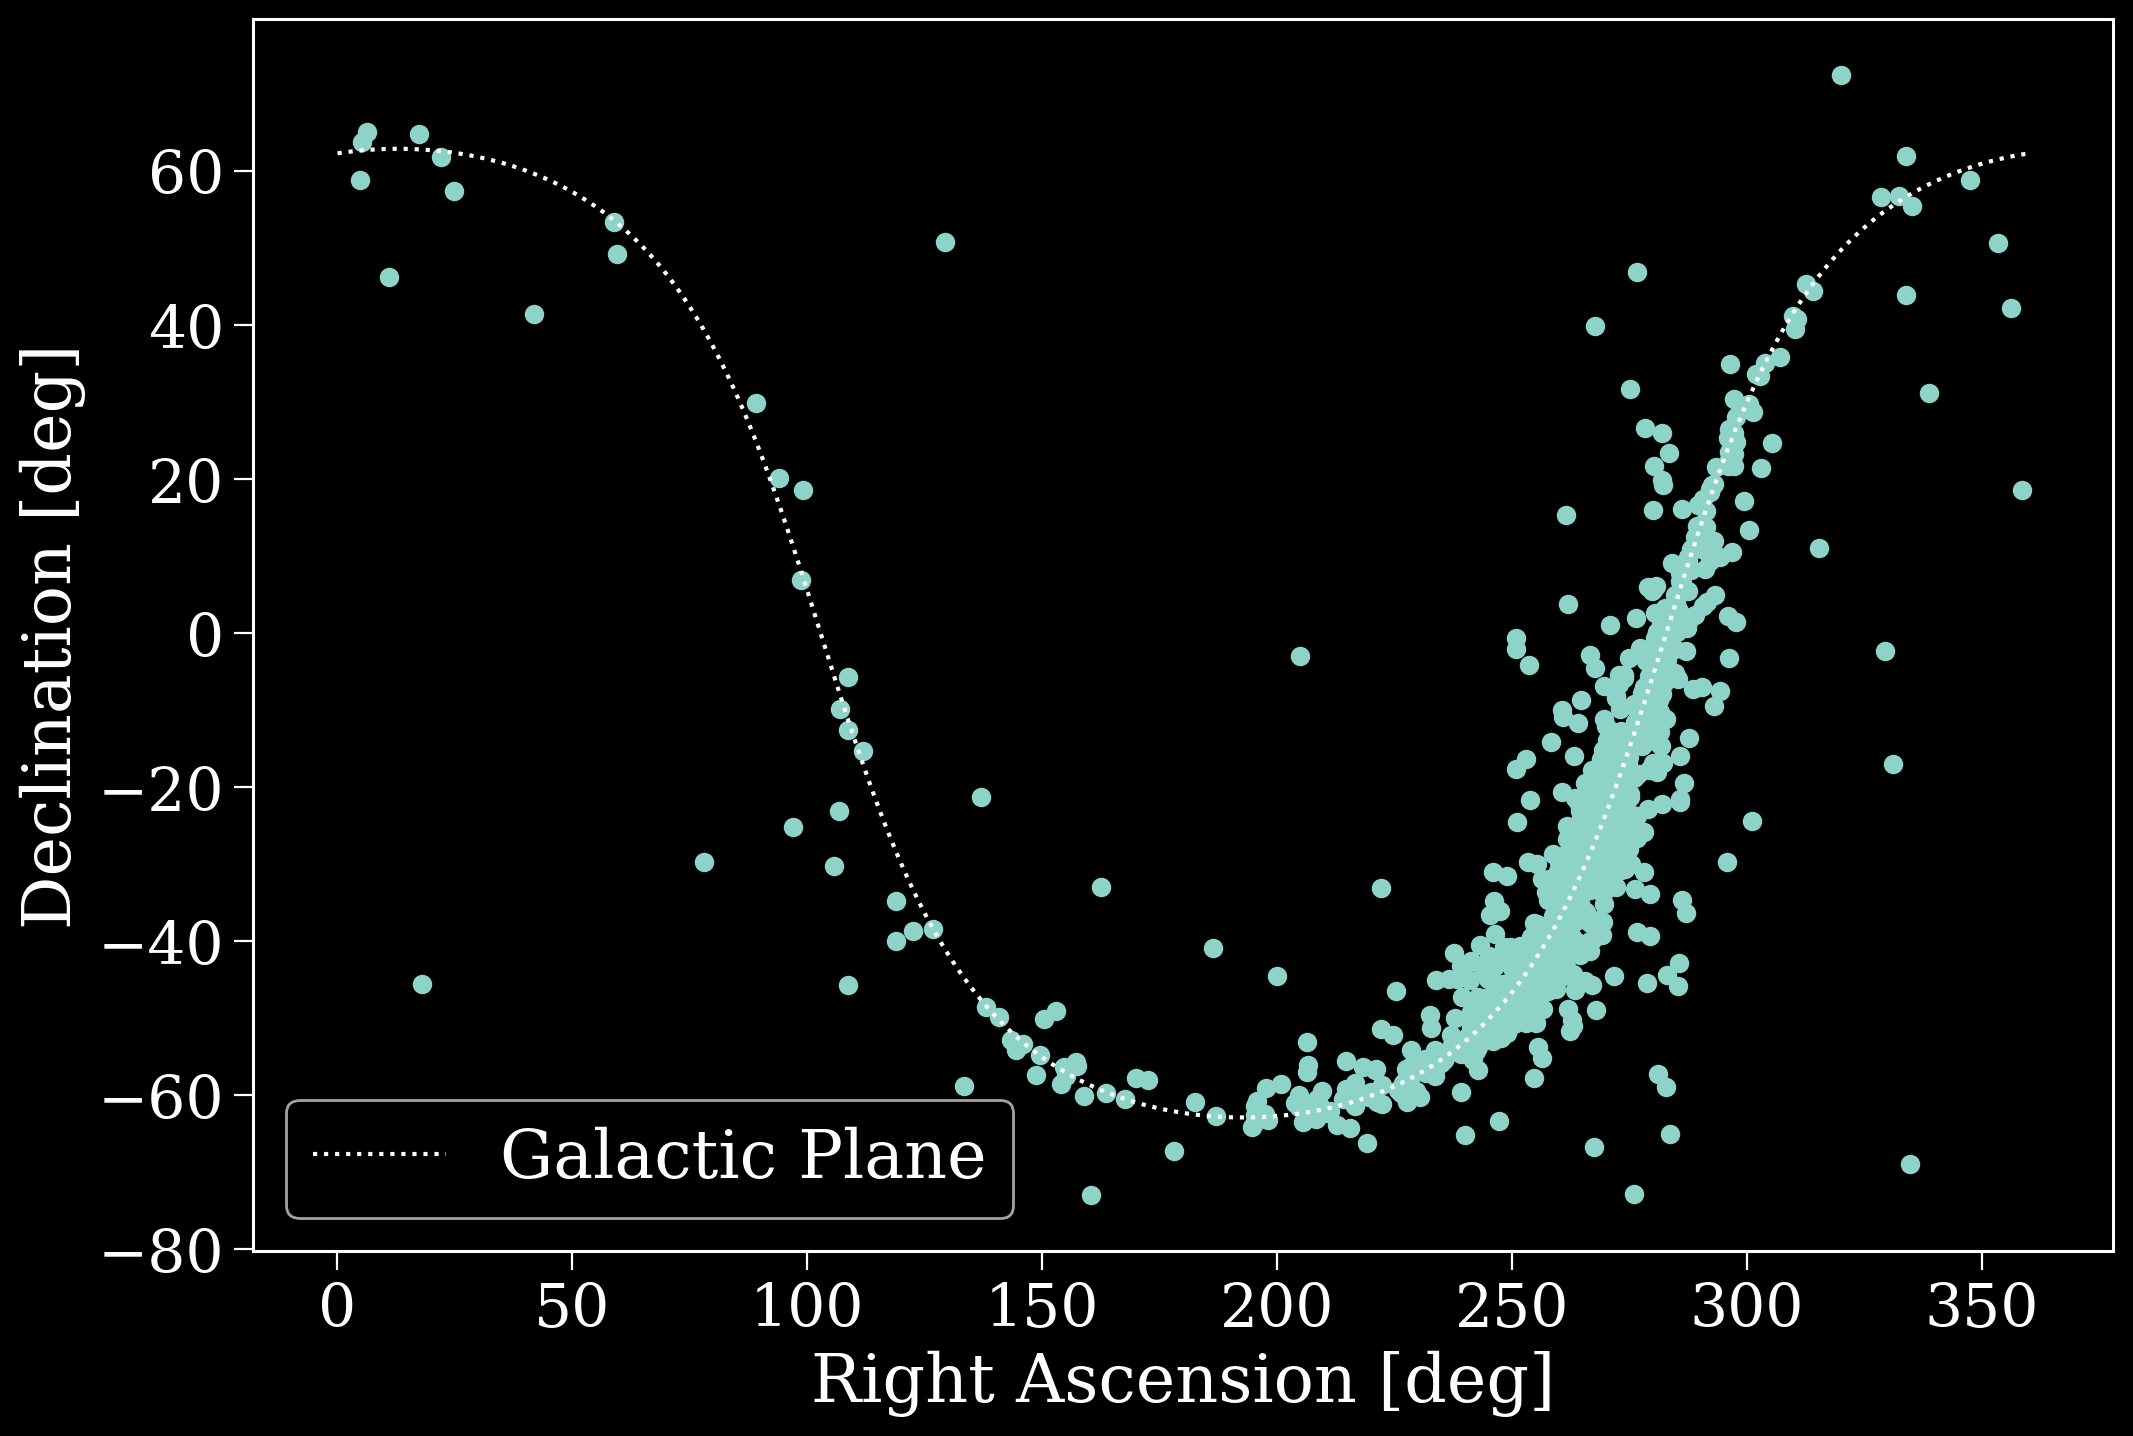

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='Right Ascension [deg]', ylabel='Declination [deg]'>)

In [6]:
p.plot_sky_locations()

We could also style this differently to colour the points by their distance from the galactic centre. The function allows you to pass any kwargs you like to the `.scatter` call so we can restyle the point a bit as well.

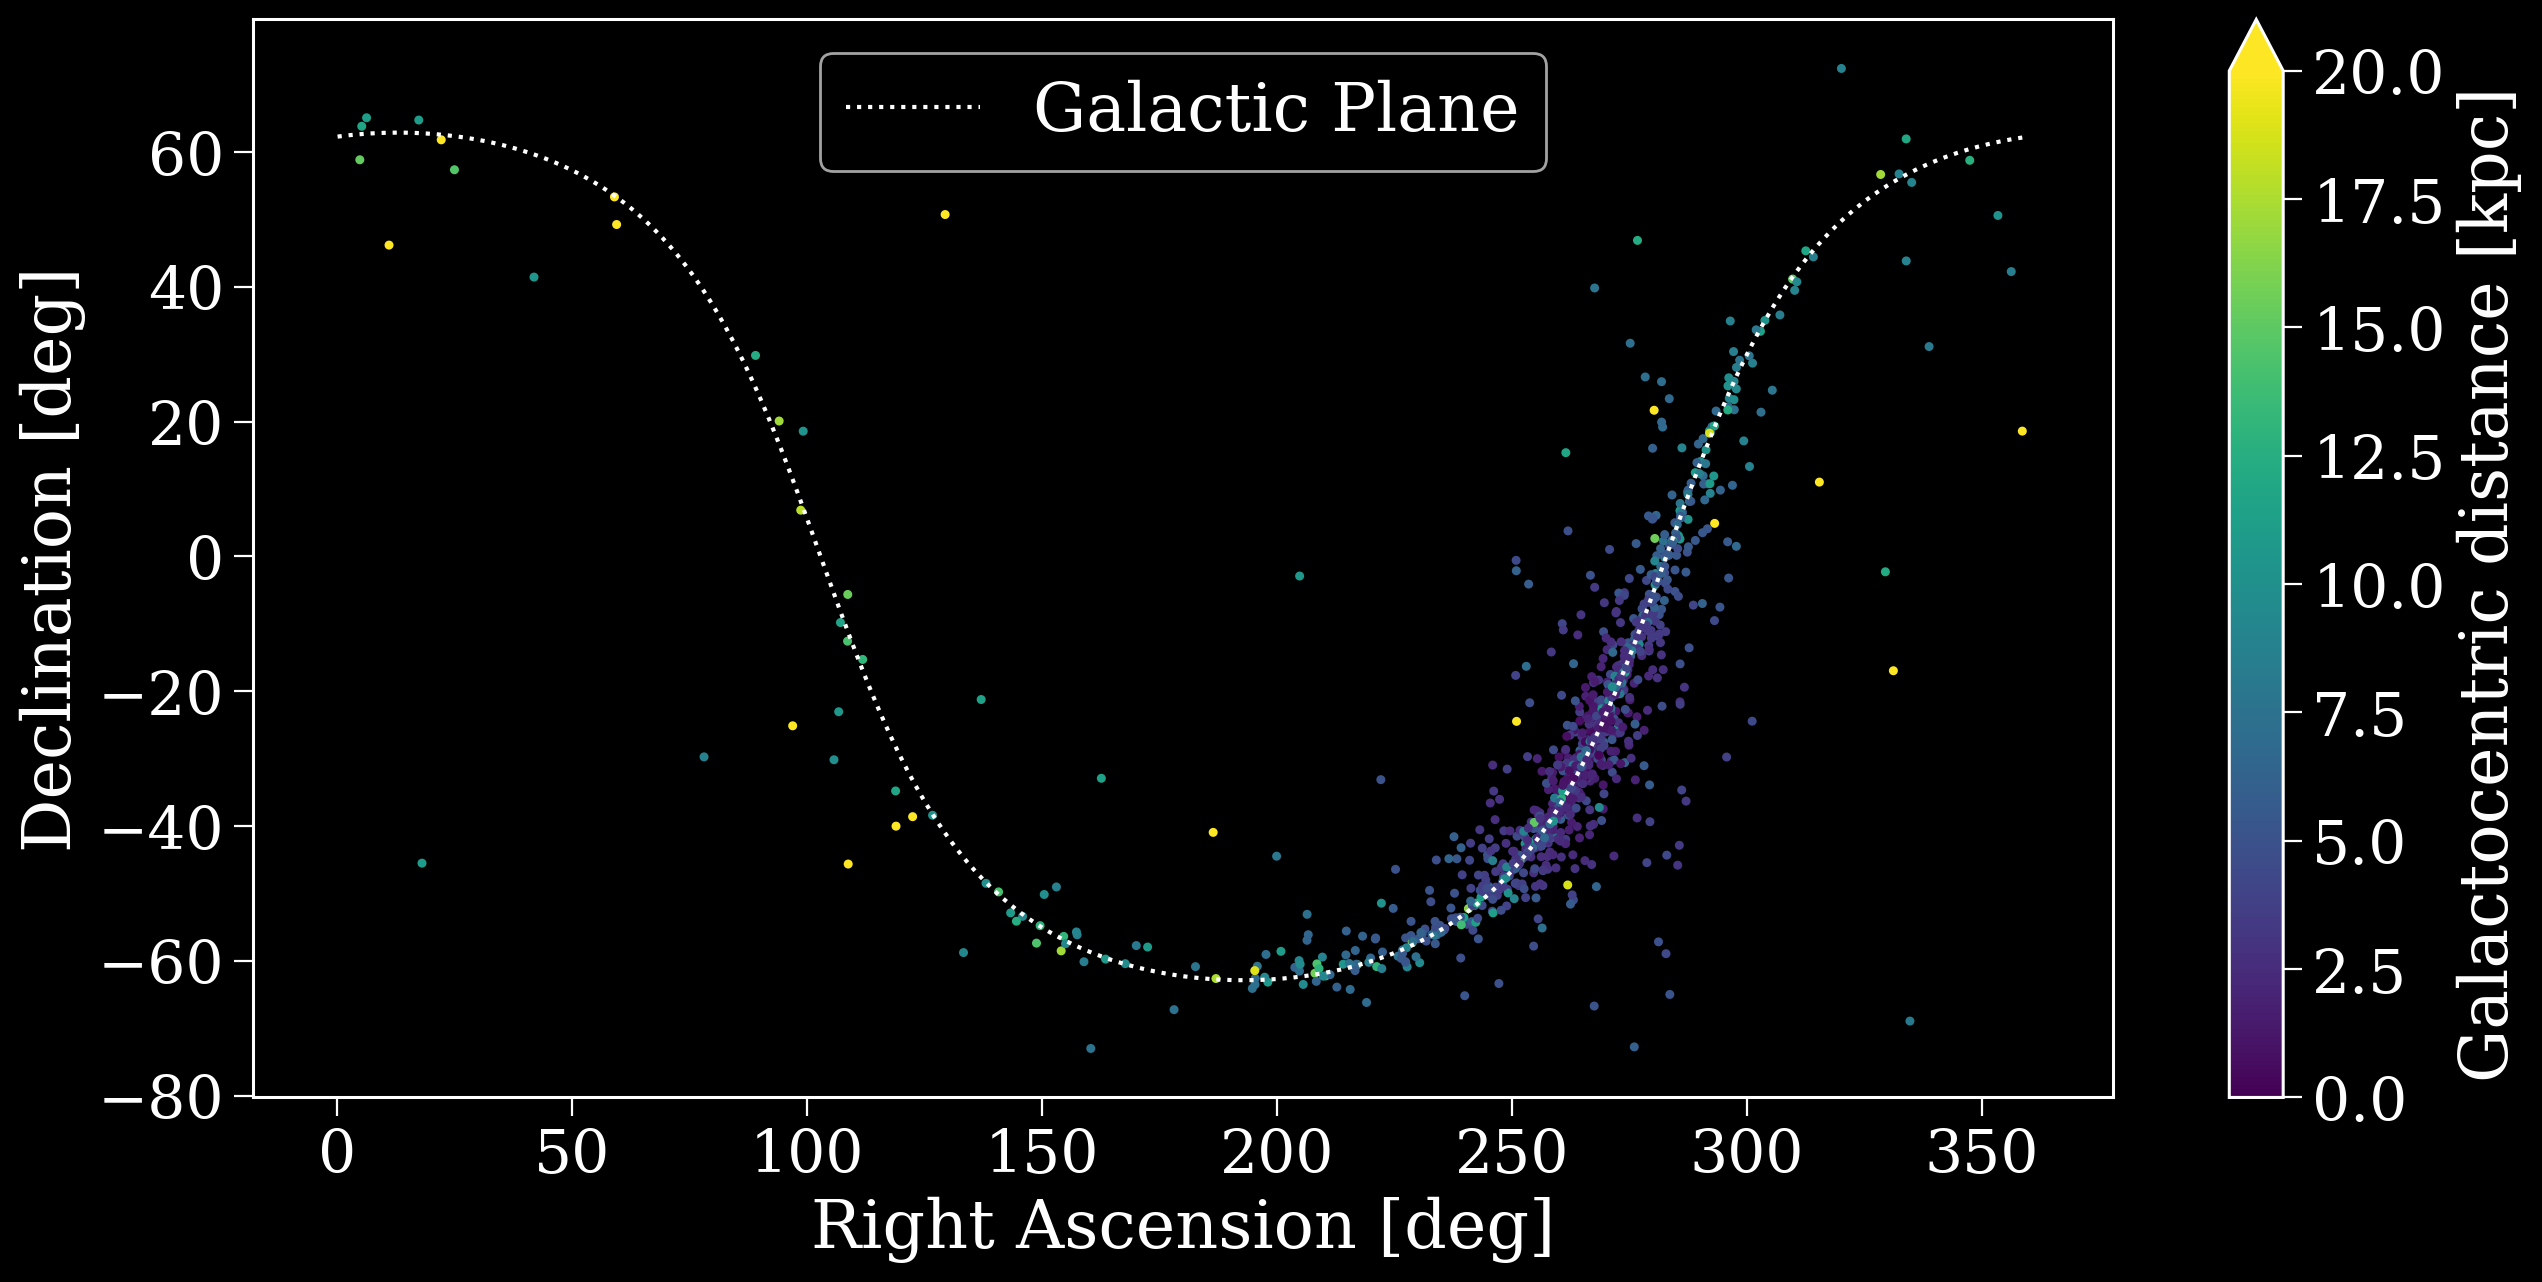

In [7]:
dist = (final_coords.x**2 + final_coords.y**2 + final_coords.z**2)**(0.5)

# define a wider axis
fig, ax = plt.subplots(figsize=(15, 7))

# plot the points coloured by distance (and make them a little smaller)
fig, ax = p.plot_sky_locations(s=5, c=dist.value, vmin=0, vmax=20, fig=fig, ax=ax, show=False)

# add a colourbar for the scatter
fig.colorbar(ax.collections[0], extend='max', label="Galactocentric distance [kpc]")
plt.show()

We can even highlight the disrupted objects as well!

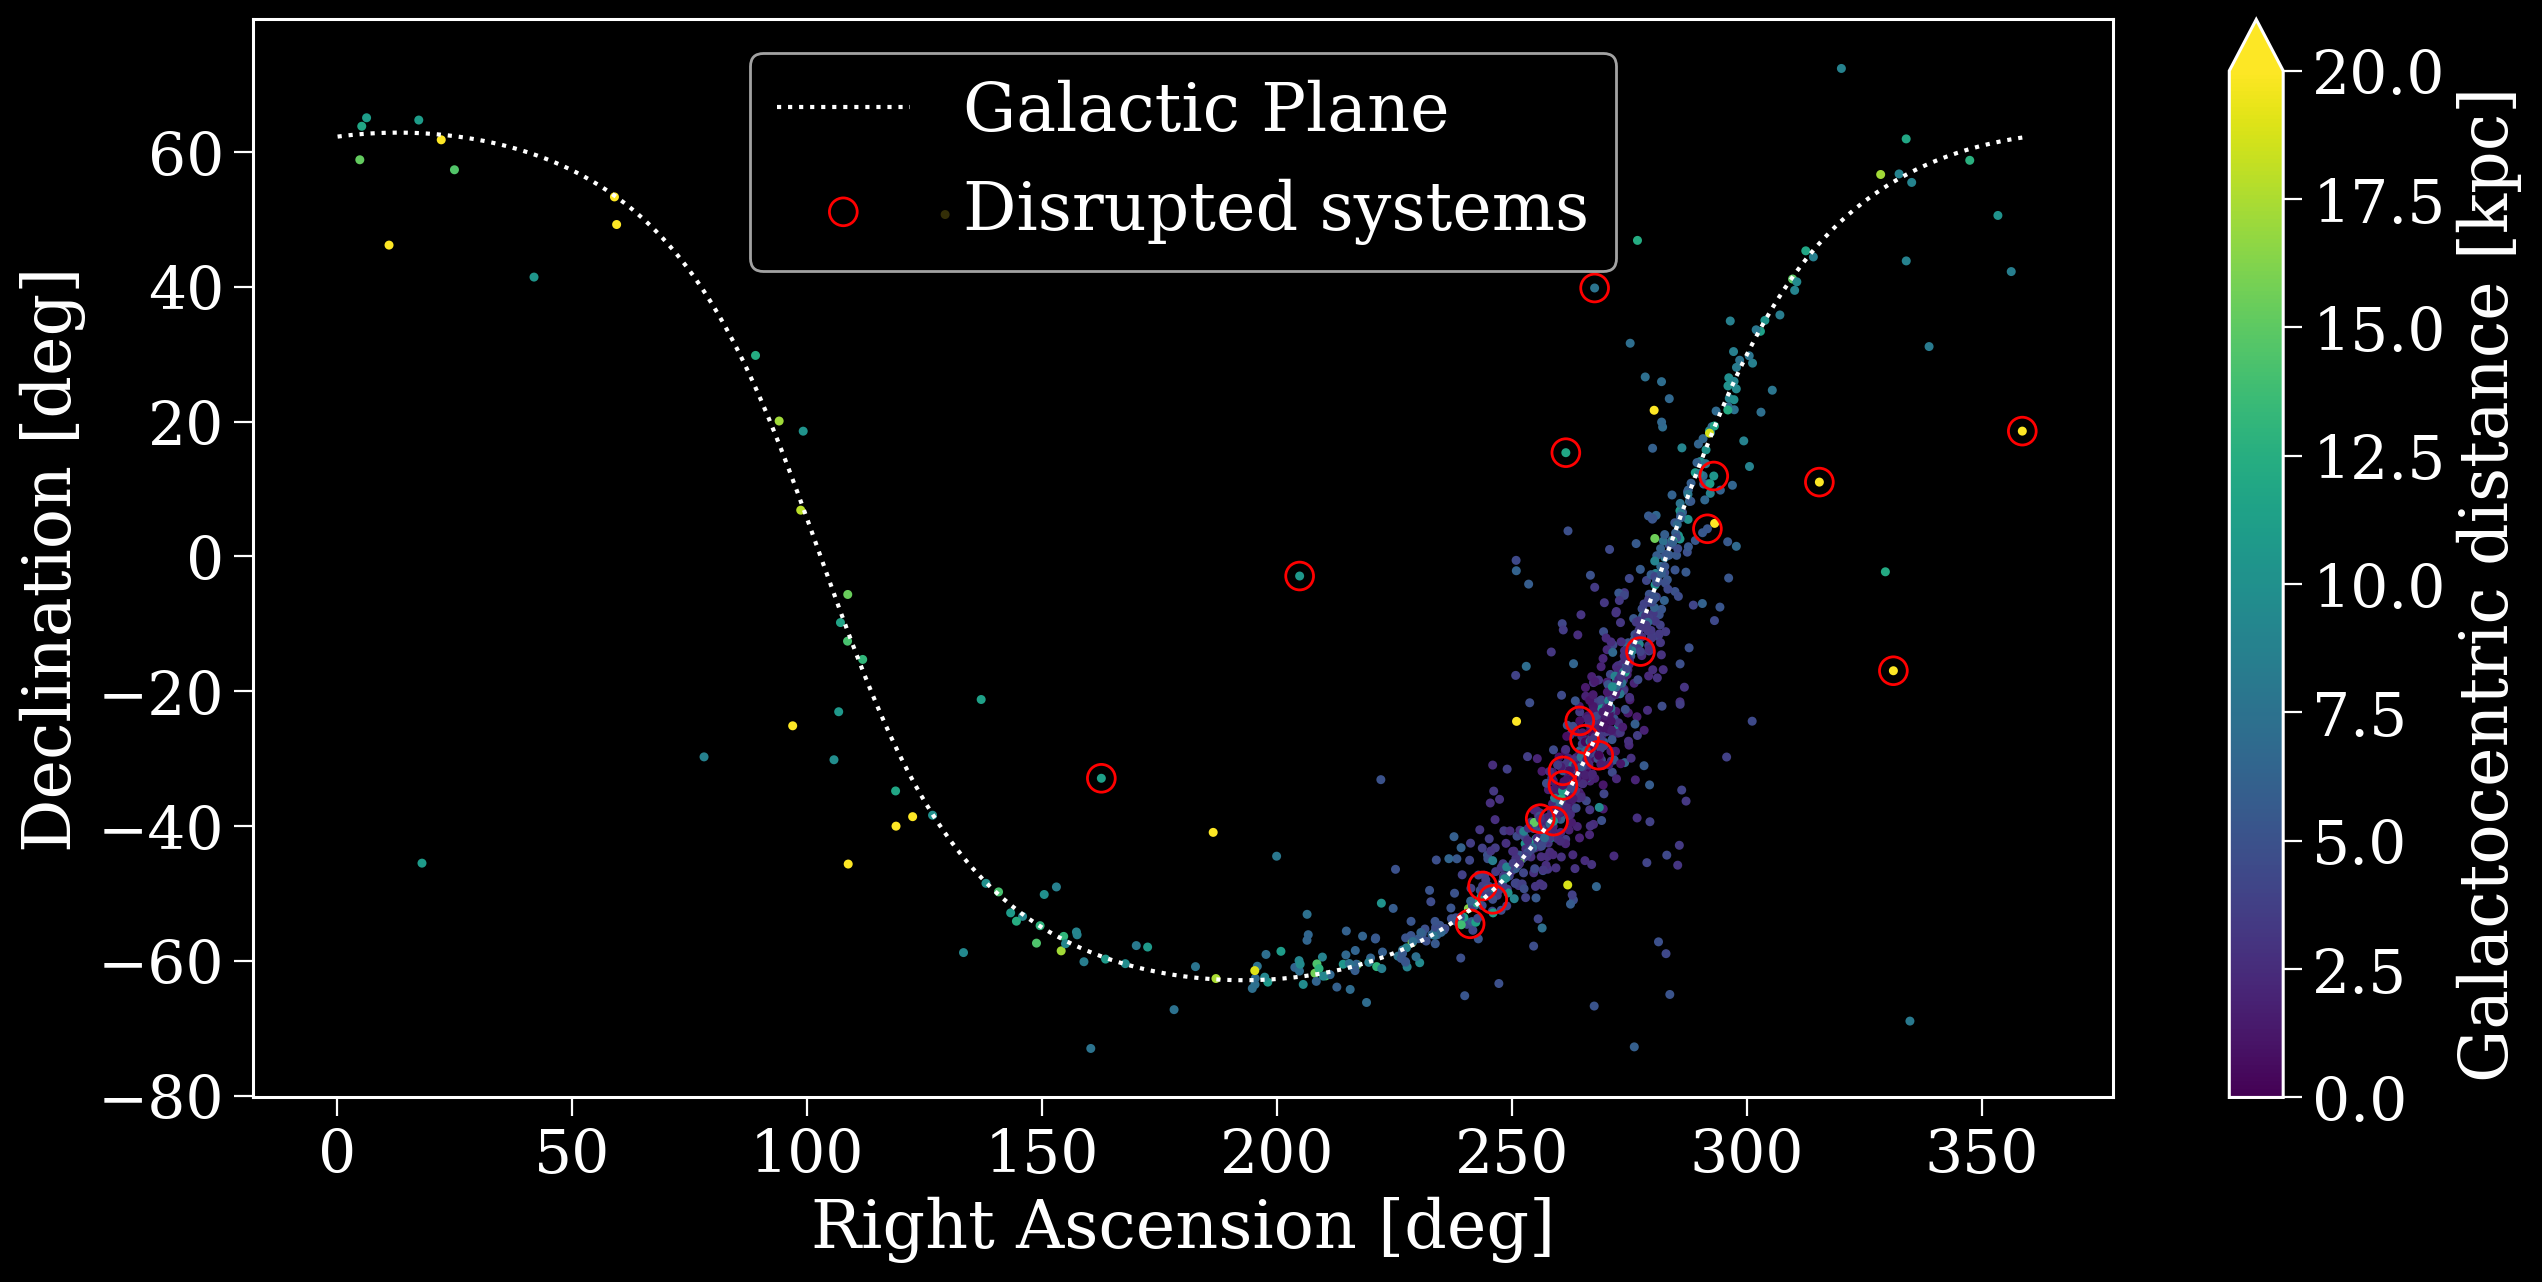

In [8]:
dist = (final_coords.x**2 + final_coords.y**2 + final_coords.z**2)**(0.5)

# define a wider axis
fig, ax = plt.subplots(figsize=(15, 7))

# plot the points coloured by distance (and make them a little smaller)
fig, ax = p.plot_sky_locations(s=5, c=dist.value, vmin=0, vmax=20, fig=fig, ax=ax, show=False)

disrupted_pop = p[p.disrupted]
disrupted_pop.plot_sky_locations(s=100, edgecolor="red", facecolor="none", fig=fig, ax=ax, show=False,
                                 label="Disrupted systems", show_galactic_plane=False)

# add a colourbar for the scatter
fig.colorbar(ax.collections[0], extend='max', label="Galactocentric distance [kpc]")
plt.show()

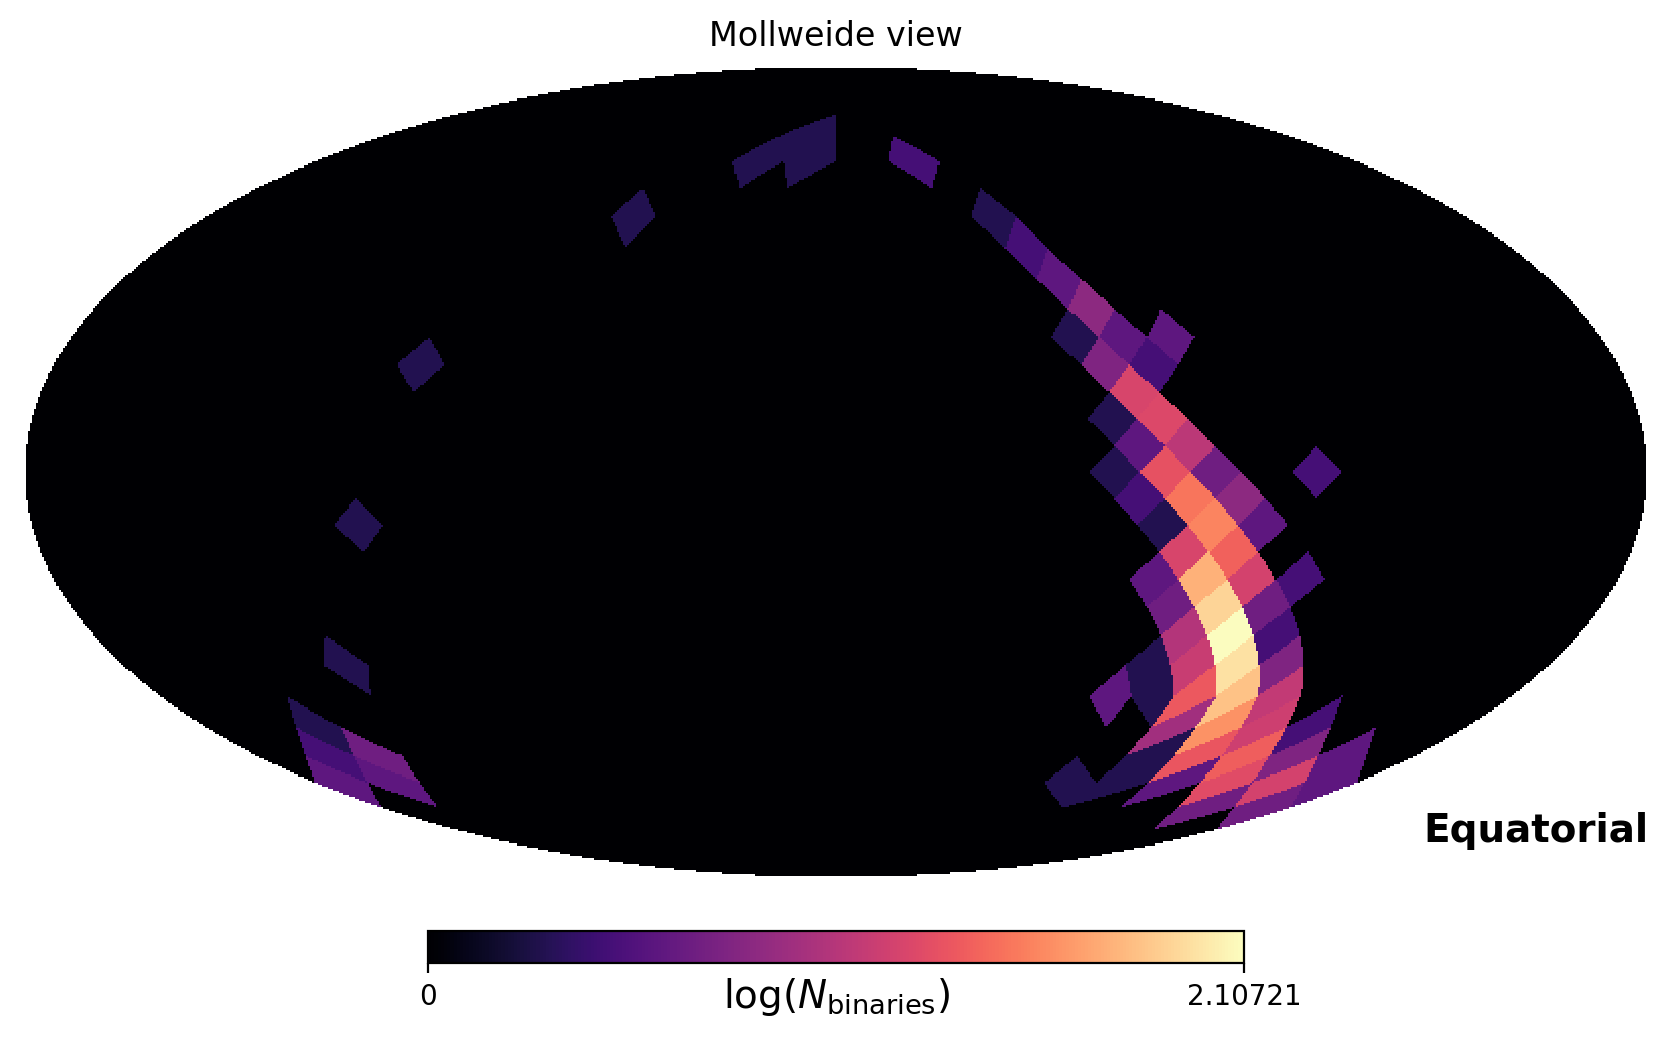

In [17]:
p.plot_map(ra="auto", dec="auto", nside=8)

You can also change the coordinates or colourmap of this with the various parameters

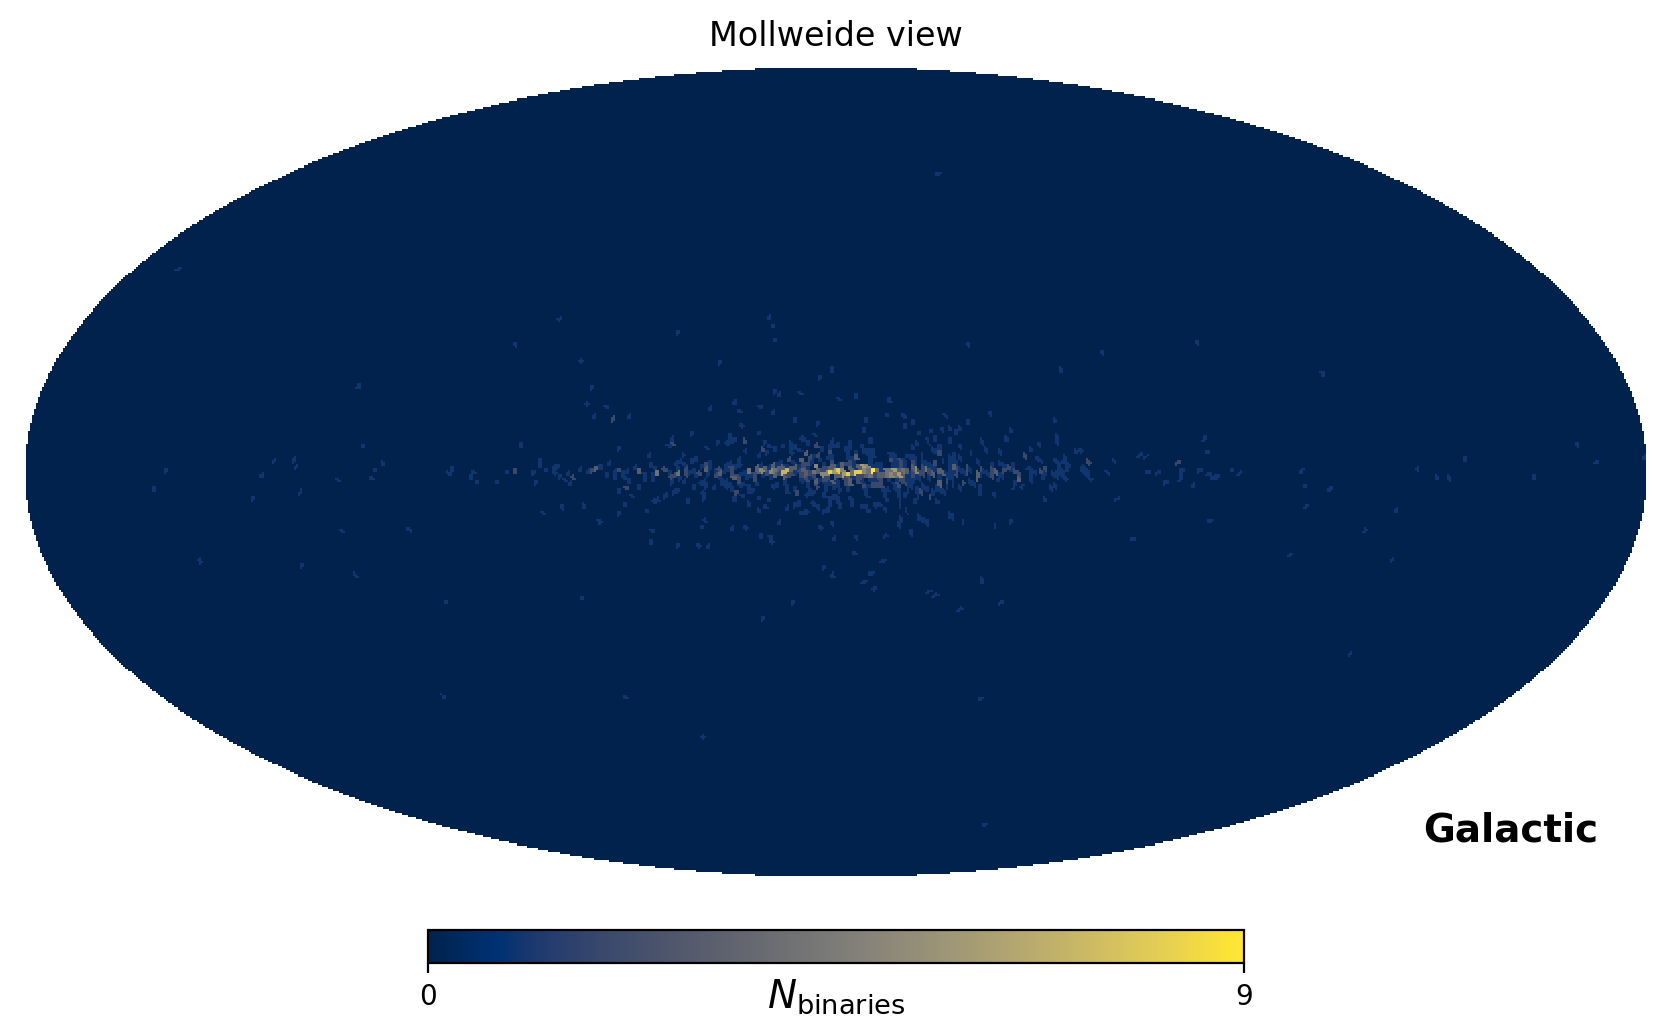

In [27]:
p.plot_map(ra="auto", dec="auto", nside=64, norm="linear", coord="G", cmap="cividis")